ModuleNotFoundError: No module named 'cartopy'

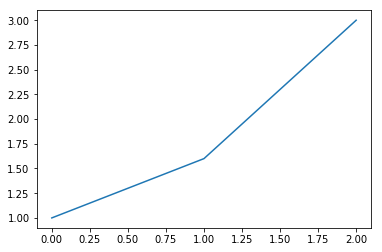

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,1.6,3])
import constants as c
import database as db
import numpy as np

from util import get_closest
%load_ext autoreload
%autoreload 2


nodes = db.load_list(c.NODES_FILENAME)
ships = db.load_list(c.SHIPS_FILENAME)

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
ship = ships[4]
import cartopy.crs as ccrs

Map.plot_route(ship.xyt[0], ship.xyt[1])
Map.draw().set_extent([1800100, 3400100, 7600100, 8800100], crs=ccrs.Mercator())
Map.draw_area(c.MEAS_AREA, 'green')
print(ship.detect_passages())
# 167 µs per loop
#%timeit ship.detect_passages()

[[    169161     169627     171149]
 [   6701854    6702218    6705185]
 [1529125185 1529125784 1529126383]]
[ 591.31379148 3334.6023751   831.65497654]
[0.98716827 5.56694887 1.38840564]
[(36, 41), (43, 47), (49, 49), (86, 86), (88, 91), (93, 99), (104, 110), (112, 117), (195, 200), (202, 202), (204, 209), (225, 230), (232, 239), (243, 248), (250, 257), (261, 266), (268, 275), (330, 345), (360, 367), (369, 372), (374, 374), (376, 377), (393, 394), (396, 410), (489, 501), (503, 503), (508, 509), (547, 552), (554, 554), (556, 561), (563, 564), (620, 620), (633, 638), (640, 640), (642, 647), (691, 696), (698, 698), (700, 703), (705, 706), (736, 741), (743, 743), (745, 750), (760, 774), (777, 777), (779, 791), (835, 840), (842, 842), (844, 849), (851, 851), (1020, 1021), (1024, 1038), (1042, 1053), (1055, 1056), (1133, 1138), (1140, 1140), (1142, 1147), (1163, 1168), (1170, 1170), (1172, 1177), (1181, 1186), (1188, 1195), (1199, 1212), (1268, 1269), (1271, 1274), (1276, 1276), (1278, 1283

In [ ]:
#tests and visualizations
    # reach %-score map
    # reach
        # conf matrix + scores
            # with and wihout k optimization
        # map of recall and sensitivity by nodes
    # path
        # accuracy graphs

In [36]:

import route

node = get_closest(nodes, 10000, 6555000)
#print(len(node.passages))
p = node.passages[12]
xy = np.array((p.x, p.y))
#(95, 105)
#10000 loops, best of 5: 20.4 µs per loop

%timeit route.route_in_area(xy)
#for p in node.passages:
#    print(route.route_in_area(p.x, p.y))


100000 loops, best of 5: 6.46 µs per loop


In [86]:
from constants import MEAS_AREA 

def route2(xy):
    enters_i = False
    x = xy[0]
    y = xy[1]

    b = ((xy[0] > MEAS_AREA[0]) & (xy[0] < MEAS_AREA[1]) &
         (xy[1] > MEAS_AREA[2]) & (xy[1] < MEAS_AREA[3]))

    for i in range(0, len(x) - 1):
        if b[i]:

            if enters_i is False:
                enters_i = i

        elif enters_i is not False:
            return enters_i, i

    if enters_i is not False:
        return enters_i, len(x) - 1
    else:
        return False

%timeit route2(xy)



The slowest run took 4.98 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 12.2 µs per loop


(95, 105)